# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math 
import scipy as sp
import statsmodels.formula.api as smf
import seaborn as sns 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
firearms = pd.read_csv ("World firearms murders and ownership - Sheet 1.csv")
ms = pd.read_csv("ms.csv") 
pop = pd.read_csv("pop_by_country.csv")
gdp = pd.read_csv("GDP.csv")

In [113]:
join = pd.merge(ms, firearms, left_on='Country', right_on='Country/Territory')
join.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Denmark,12.0,0,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0
4,Finland,45.3,2,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0


In [66]:
join = join.drop(["Country/Territory","ISO code"],  axis = 1)
join.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0


In [67]:
pop1 = pop[["Country Name","2012"]]
pop1.rename(columns={'Country Name': 'Country Name', '2012': 'population'}, inplace=True)
pop1.head()

,Country Name,population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [68]:
gdp1 = gdp[["Country Name", "2012"]]
gdp1.rename(columns={'Country Name': 'Country Name', '2012': 'gdp'}, inplace=True)
gdp1.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153980e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [69]:
df_ = pd.merge(join, pop1, left_on="Country", right_on="Country Name")
df_.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name,population
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,22728254.0
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,8429991.0
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,34750545.0
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,5591572.0
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,5413971.0


In [73]:
df = pd.merge(df_, gdp1, left_on="Country", right_on="Country Name")
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name_x,population,Country Name_y,gdp
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,22728254.0,Australia,1.538190e+12
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,8429991.0,Austria,4.074520e+11
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,34750545.0,Canada,1.824290e+12
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,5591572.0,Denmark,3.271490e+11
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,5413971.0,Finland,2.567060e+11


In [74]:
df = df.drop(["Country Name_x","Country Name_y"],  axis = 1)
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,population,gdp
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538190e+12
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074520e+11
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824290e+12
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271490e+11
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567060e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


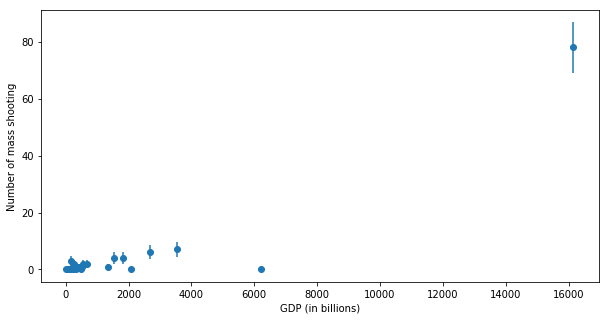

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [80]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


#### Figure 1: scatter diagram of Number of Mass Shooting against GDP (in billions).

In [82]:
df['shootingspp'] = df["Number of mass shootings"] / df['population'] * 1e3
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,population,gdp,shootingspp
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538190e+12,0.000176
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074520e+11,0.000119
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824290e+12,0.000115
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271490e+11,0.000000
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567060e+11,0.000369


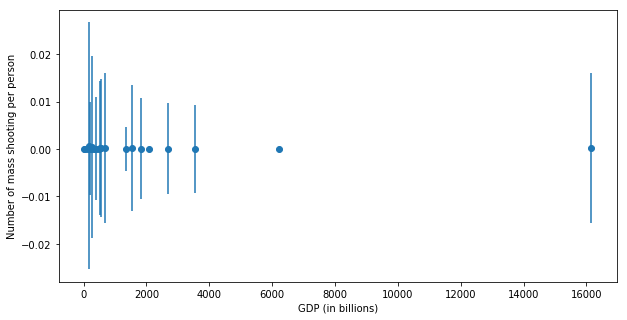

Number of mass shooting per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [85]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['shootingspp'])
ax.errorbar(df.gdp / 1e9, df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


#### Figure 2: scatter diagram of Number of Mass Shooting against GDP (in billions) with errorbars.

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [83]:
df["FireArmspp"] = df["Average total all civilian firearms"]/df['population'] * 1e3

the frequency of average number of civilian firearms per person


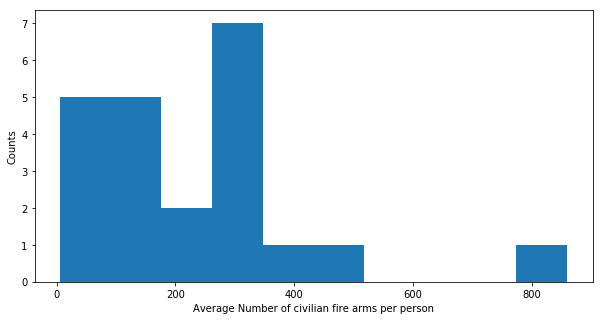

In [89]:
fig = pl.figure(figsize(10, 5))
ax = fig.add_subplot(111)
hist = ax.hist(df["FireArmspp"])
ax.set_xlabel("Average Number of civilian fire arms per person")
ax.set_ylabel("Counts")
ax.set_ylim()
print("the frequency of average number of civilian firearms per person")

#### Figure 3: histogram demonstrating the distribution of Average Number of Civilian Firearms per person.

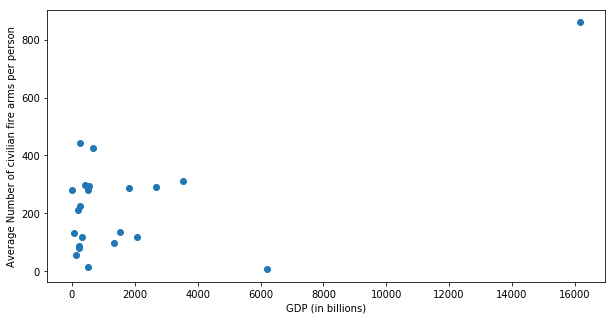

Average Number of civilian fire arms per person vs GDP, The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [86]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['FireArmspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average Number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("Average Number of civilian fire arms per person vs GDP, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

#### Figure 4: scatter plot of Average Number of civilian firearms per person vs GDP(in billions)

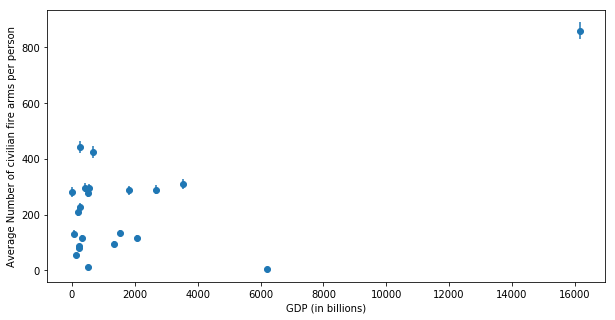

Average Number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of fire arms per person


In [96]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['FireArmspp'])
ax.errorbar(df.gdp / 1e9, df['FireArmspp'], 
            yerr = np.sqrt(df['FireArmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average Number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("Average Number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of fire arms per person")

#### Figure 5: scatter plot of Average Number of civilian firearms per person vs GDP(in billions) with errorbars

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

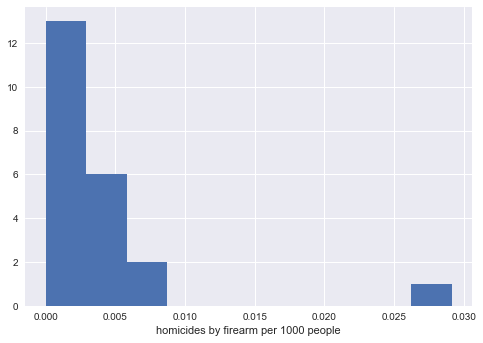

In [474]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


#### Figure 6: Histogram demonstrating the diatribution of Homicide by firearm (per 1000 people)

In [92]:
df["homicide per 1000 ppl"] = df['Number of homicides by firearm']/df["population"]*1000
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,population,gdp,shootingspp,FireArmspp,homicidepp,homicide per 1000 ppl
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538190e+12,0.000176,134.194206,0.000001,0.001320
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074520e+11,0.000119,296.560222,0.000002,0.002135
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824290e+12,0.000115,286.326445,0.000005,0.004978
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271490e+11,0.000000,116.246379,0.000003,0.002683
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567060e+11,0.000369,443.297535,0.000004,0.004433


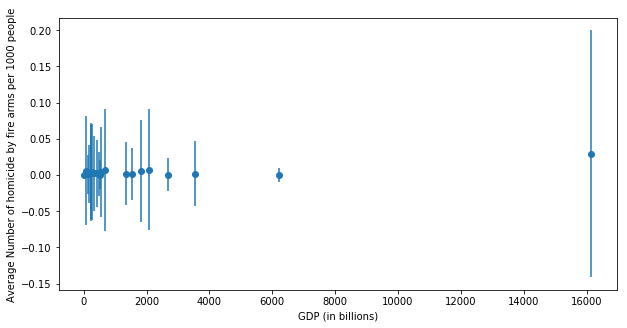

Average Number of homicide by fire arms per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of homicides per 1000 people


In [95]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp  / 1e9,df["homicide per 1000 ppl"])
ax.errorbar(df.gdp / 1e9, df["homicide per 1000 ppl"], 
            yerr = np.sqrt(df["homicide per 1000 ppl"] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average Number of homicide by fire arms per 1000 people")
ax.set_ylim()
pl.show()
print ("Average Number of homicide by fire arms per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of homicides per 1000 people")

#### Figure 7: Scatter plot for Average Number of homicide by firearms (per 1000 people) against GDP with errror bars

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


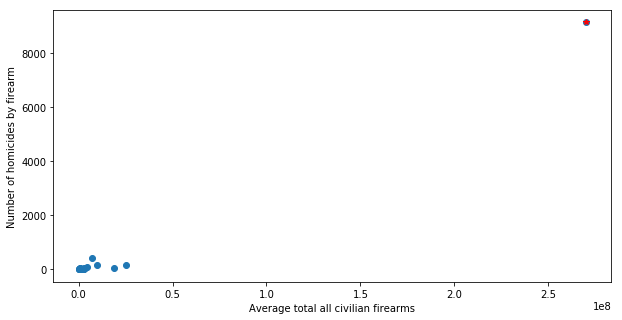

Number of homicides by firearm vs Average total civilian firearms. The datapoint to the top right of the plot is the USA which has the highest number of fire arms and the highest number of homicides incidents


In [117]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df["Average total all civilian firearms"], df["Number of homicides by firearm"])
ax.plot(df["Average total all civilian firearms"][21], df["Number of homicides by firearm"][21], 'r*')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()

print("Number of homicides by firearm vs Average total civilian firearms. " + 
      "The datapoint to the top right of the plot is the USA" + 
      " which has the highest number of fire arms and the highest number of homicides incidents" )

#### Figure 8: scatter plot for homicides against average total civilian firearms, with U.S. marked differently as an outlier

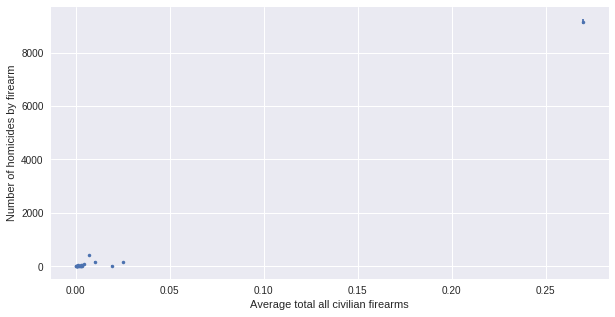

Number of homicides by firearm vs Average total civilian firearms. errorbars represent Poisson statistics. The datapoint to the top right of the plot is the USAwhich has the highest number of fire arms and the highest number of homicides incidents


In [238]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)


ax.errorbar(df["Average total all civilian firearms"] / 1e9, df["Number of homicides by firearm"], 
            yerr = np.sqrt(df["Number of homicides by firearm"] * 1.0), fmt = '.')
# the error bars are very small and can be invisible after adding the scatter plot of civilian firearms vs homicides.
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()

pl.show()
print("Number of homicides by firearm vs Average total civilian firearms. " + 
     "errorbars represent Poisson statistics. " + 
    "The datapoint to the top right of the plot is the USA" + 
      "which has the highest number of fire arms and the highest number of homicides incidents")

#### Figure 9: the plot for errorbars of Figure 8

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


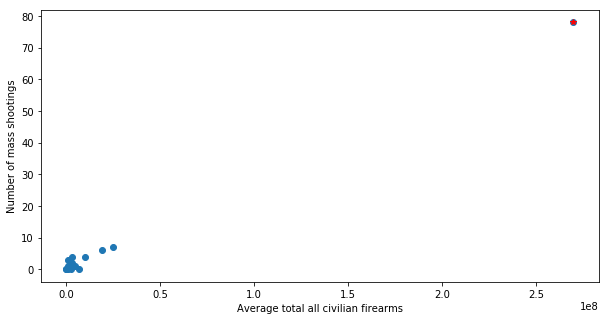

Number of homicides by firearm vs Average total civilian firearms. The datapoint to the top right of the plot is the USA which has the highest number of fire arms and the highest Number of mass shootings incidents


In [114]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df["Average total all civilian firearms"], df["Number of mass shootings"])
pl.plot(df["Average total all civilian firearms"][21], df["Number of mass shootings"][21], 'r*')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()

print("Number of homicides by firearm vs Average total civilian firearms. " + 
      "The datapoint to the top right of the plot is the USA" + 
      " which has the highest number of fire arms and the highest Number of mass shootings incidents" )

#### Figure 10: scatter plot for Mass Shootings against average total civilian firearms, with U.S. marked differently as an outlier

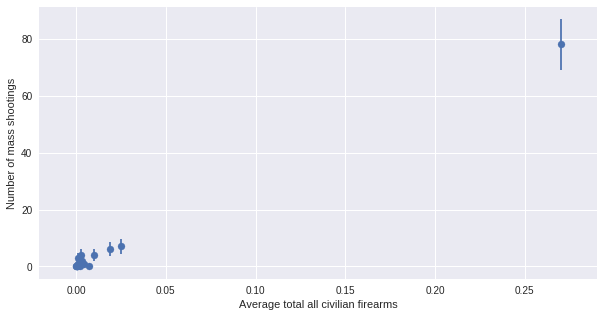

Number of mass shootings vs Average total civilian firearms. errorbars represent Poisson statistics. The datapoint to the top right of the plot is the USAwhich has the highest number of fire arms and the highest Number of mass shootings incidents


In [229]:
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(df["Average total all civilian firearms"] / 1e9, df["Number of mass shootings"])
ax.errorbar(df["Average total all civilian firearms"] / 1e9, df["Number of mass shootings"], 
            yerr = np.sqrt(df["Number of mass shootings"] * 1.0), fmt = '.')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()

print("Number of mass shootings vs Average total civilian firearms. " + 
     "errorbars represent Poisson statistics. " + 
    "The datapoint to the top right of the plot is the USA" + 
      "which has the highest number of fire arms and the highest Number of mass shootings incidents")

#### Figure 11: scatter plot for Mass Shootings against average total civilian firearms with errorbars

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [286]:
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,population,gdp,shootingspp,FireArmspp,homicidepp,homicide per 1000 ppl
0,Australia,15.0,4,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538190e+12,0.000176,134.194206,0.000001,0.001320
1,Austria,30.4,1,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074520e+11,0.000119,296.560222,0.000002,0.002135
2,Canada,30.8,4,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824290e+12,0.000115,286.326445,0.000005,0.004978
3,Denmark,12.0,0,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271490e+11,0.000000,116.246379,0.000003,0.002683
4,Finland,45.3,2,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567060e+11,0.000369,443.297535,0.000004,0.004433


In [287]:
targeted = df[["Country","Number of mass shootings", "shootingspp","population", "Average total all civilian firearms", "FireArmspp"]]
targeted.head()

,Country,Number of mass shootings,shootingspp,population,Average total all civilian firearms,FireArmspp
0,Australia,4,0.000176,22728254.0,3050000.0,134.194206
1,Austria,1,0.000119,8429991.0,2500000.0,296.560222
2,Canada,4,0.000115,34750545.0,9950000.0,286.326445
3,Denmark,0,0.000000,5591572.0,650000.0,116.246379
4,Finland,2,0.000369,5413971.0,2400000.0,443.297535


In [289]:
# calculating the mean of the mass shooting for obtaining the order of magnitude
ms_average = df["shootingspp"].mean()
print(ms_average)

0.000121021254397


In [290]:
# calculating the mean of the number of firearms for obtaining the order of magnitude
fa_average = df['FireArmspp'].mean()
fa_average

228.95008572891783

In [291]:
targeted["firearm_rescaled"] = targeted["FireArmspp"]/ (10**3)
targeted["massshooting_rescaled"] = targeted["shootingspp"] / (10**(-4))
targeted.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Country,Number of mass shootings,shootingspp,population,Average total all civilian firearms,FireArmspp,firearm_rescaled,massshooting_rescaled
0,Australia,4,0.000176,22728254.0,3050000.0,134.194206,0.134194,1.759924
1,Austria,1,0.000119,8429991.0,2500000.0,296.560222,0.296560,1.186241
2,Canada,4,0.000115,34750545.0,9950000.0,286.326445,0.286326,1.151061
3,Denmark,0,0.000000,5591572.0,650000.0,116.246379,0.116246,0.000000
4,Finland,2,0.000369,5413971.0,2400000.0,443.297535,0.443298,3.694146


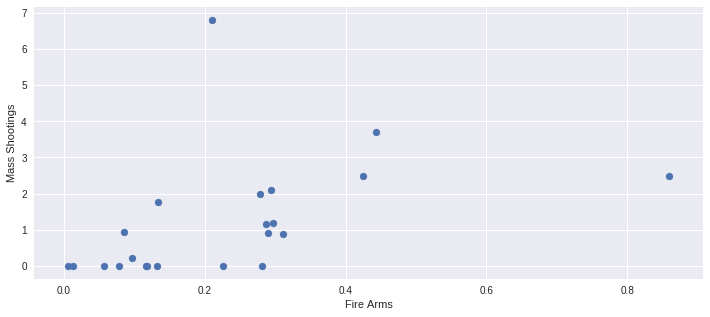

In [292]:
fig = pl.figure(figsize = (12, 5))
ax = fig.add_subplot(111)

scatter = ax.scatter(targeted["firearm_rescaled"], targeted["massshooting_rescaled"])
ax.set_xlabel("Fire Arms")
ax.set_ylabel("Mass Shootings")

#### Figure 12: scatter plot for Mass Shootings against Fire Arms

In [293]:
# OLS model
lm = smf.ols(formula = 'massshooting_rescaled~firearm_rescaled', data = targeted ).fit()
print lm.params
print lm.rsquared

Intercept           0.31488
firearm_rescaled    3.91060
dtype: float64
0.199063858524


In [294]:
targeted["MassShooting_OLS"] = lm.params[0] + lm.params[1]*targeted["firearm_rescaled"]

targeted.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Country,Number of mass shootings,shootingspp,population,Average total all civilian firearms,FireArmspp,firearm_rescaled,massshooting_rescaled,MassShooting_OLS
0,Australia,4,0.000176,22728254.0,3050000.0,134.194206,0.134194,1.759924,0.839660
1,Austria,1,0.000119,8429991.0,2500000.0,296.560222,0.296560,1.186241,1.474609
2,Canada,4,0.000115,34750545.0,9950000.0,286.326445,0.286326,1.151061,1.434589
3,Denmark,0,0.000000,5591572.0,650000.0,116.246379,0.116246,0.000000,0.769473
4,Finland,2,0.000369,5413971.0,2400000.0,443.297535,0.443298,3.694146,2.048440


In [272]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     massshooting_rescaled   R-squared:                       0.199
Model:                               OLS   Adj. R-squared:                  0.159
Method:                    Least Squares   F-statistic:                     4.971
Date:                   Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                           21:58:02   Log-Likelihood:                -39.232
No. Observations:                     22   AIC:                             82.46
Df Residuals:                         20   BIC:                             84.65
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.3149      0.515      0.612      0.548        -0.759     1.388
firearm_rescaled     3.9106      1.754      2.230      0.037         0.252     7.569
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

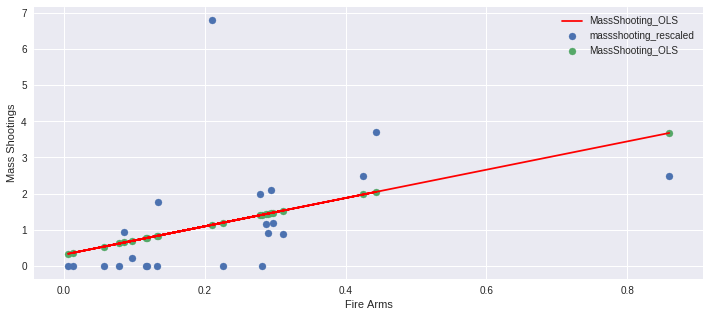

In [273]:
fig = pl.figure(figsize = (12, 5))
ax = fig.add_subplot(111)

scatter1 = ax.scatter(targeted["firearm_rescaled"], targeted["massshooting_rescaled"])
scatter2 = ax.scatter(targeted["firearm_rescaled"], targeted["MassShooting_OLS"])
line = ax.plot(targeted["firearm_rescaled"], targeted["MassShooting_OLS"], "r-")
ax.set_xlabel("Fire Arms")
ax.set_ylabel("Mass Shootings")
ax.legend()

#### Figure 13: scatter plot for Mass Shootings against Fire Arms, with OLS regression model

In [298]:
weights = pd.DataFrame(targeted["Number of mass shootings"])
weights[weights == 0] = 1 # All 0 entries are replaced by 1 

weights.head()

,Number of mass shootings
0,4
1,1
2,4
3,1
4,2


In [299]:
# calculating weights for WLS model

targeted["weights"] = (1.0 / weights)**2
targeted.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Country,Number of mass shootings,shootingspp,population,Average total all civilian firearms,FireArmspp,firearm_rescaled,massshooting_rescaled,MassShooting_OLS,weights
0,Australia,4,0.000176,22728254.0,3050000.0,134.194206,0.134194,1.759924,0.839660,0.0625
1,Austria,1,0.000119,8429991.0,2500000.0,296.560222,0.296560,1.186241,1.474609,1.0000
2,Canada,4,0.000115,34750545.0,9950000.0,286.326445,0.286326,1.151061,1.434589,0.0625
3,Denmark,0,0.000000,5591572.0,650000.0,116.246379,0.116246,0.000000,0.769473,1.0000
4,Finland,2,0.000369,5413971.0,2400000.0,443.297535,0.443298,3.694146,2.048440,0.2500


In [282]:
lm2 = smf.wls(formula = 'massshooting_rescaled~firearm_rescaled', data = targeted, weights=list(targeted["weights"])).fit() 
print lm2.params
print lm2.rsquared

Intercept          -0.078336
firearm_rescaled    3.901929
dtype: float64
0.360135030555


In [283]:
targeted["MassShooting_WLS"] = lm2.params[0] + lm2.params[1]*targeted["firearm_rescaled"]
targeted.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Country,Number of mass shootings,shootingspp,Average total all civilian firearms,FireArmspp,firearm_rescaled,massshooting_rescaled,MassShooting_OLS,MassShooting_WLS,weights
0,Australia,4,0.000176,3050000.0,134.194206,0.134194,1.759924,0.839660,0.445281,0.568206
1,Austria,1,0.000119,2500000.0,296.560222,0.296560,1.186241,1.474609,1.078821,0.842999
2,Canada,4,0.000115,9950000.0,286.326445,0.286326,1.151061,1.434589,1.038890,0.868764
3,Denmark,0,0.000000,650000.0,116.246379,0.116246,0.000000,0.769473,0.375250,1.000000
4,Finland,2,0.000369,2400000.0,443.297535,0.443298,3.694146,2.048440,1.651380,0.270699


In [284]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              WLS Regression Results                             
=================================================================================
Dep. Variable:     massshooting_rescaled   R-squared:                       0.360
Model:                               WLS   Adj. R-squared:                  0.328
Method:                    Least Squares   F-statistic:                     11.26
Date:                   Tue, 17 Oct 2017   Prob (F-statistic):            0.00315
Time:                           22:03:41   Log-Likelihood:                -27.313
No. Observations:                     22   AIC:                             58.63
Df Residuals:                         20   BIC:                             60.81
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -0.0783      0.264     -0.297      0.770        -0.629     0.472
firearm_rescaled     3.9019      1.163      3.355      0.003         1.476     6.328
==============================================================================
Omnibus:                        9.126   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.758
Skew:                           1.120   Prob(JB):                       0.0341
Kurtosis:                       4.534   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

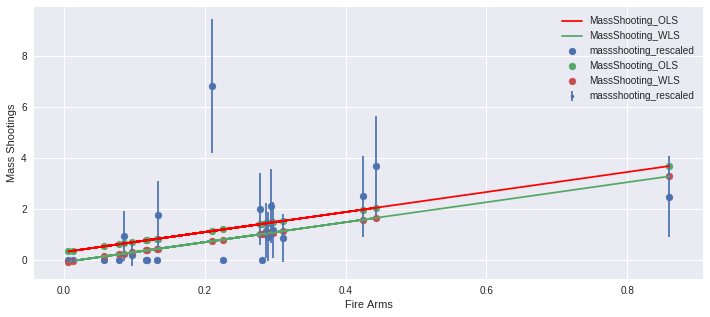

In [285]:
fig = pl.figure(figsize = (12, 5))
ax = fig.add_subplot(111)

scatter1 = ax.scatter(targeted["firearm_rescaled"], targeted["massshooting_rescaled"])

ax.errorbar(targeted["firearm_rescaled"], targeted["massshooting_rescaled"], 
            yerr = np.sqrt(targeted["massshooting_rescaled"] * 1.0), fmt = '.')

scatter2 = ax.scatter(targeted["firearm_rescaled"], targeted["MassShooting_OLS"])
scatter3 = ax.scatter(targeted["firearm_rescaled"], targeted["MassShooting_WLS"])
line1 = ax.plot(targeted["firearm_rescaled"], targeted["MassShooting_OLS"], "r-")
line2 = ax.plot(targeted["firearm_rescaled"], targeted["MassShooting_WLS"])
ax.set_xlabel("Fire Arms")
ax.set_ylabel("Mass Shootings")
ax.legend()

#### Figure 14: scatter plot for Mass Shootings against Fire Arms, with OLS and WLS linear regression model

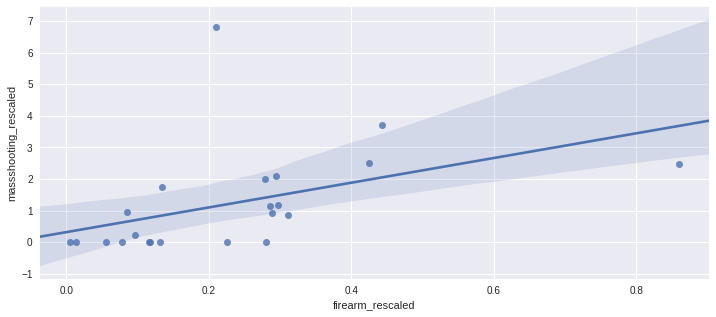

In [219]:
# Using the seaborn python package built in regression function to plot the regression confidence intervals
fig = pl.figure(figsize = (12, 5))
ax = fig.add_subplot(111)

sns.regplot(targeted["firearm_rescaled"], targeted["massshooting_rescaled"], data=targeted)

#### Figure 15: scatter plot for Mass Shootings against Fire Arms, with regression confident interval plotted by seaborn

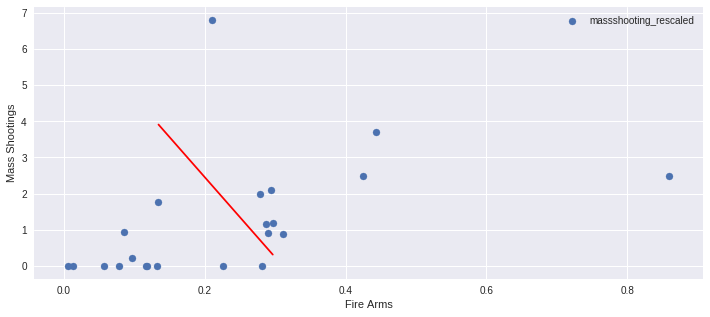

In [222]:
# Using np.polyfit() to fit a line for the two variables
x = targeted["firearm_rescaled"]
y = targeted["massshooting_rescaled"]
z = np.polyfit(x, y, 1)

fig = pl.figure(figsize = (12, 5))
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)

line = ax.plot(x[0:len(z)], z, "r-")

ax.set_xlabel("Fire Arms")
ax.set_ylabel("Mass Shootings")
ax.legend()

#### Figure 16: scatter plot for Mass Shootings against Fire Arms, with linear regression model generated by np.polyfit()

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [241]:
targeted.head()

,Country,Number of mass shootings,shootingspp,Average total all civilian firearms,FireArmspp,firearm_rescaled,massshooting_rescaled,MassShooting_OLS,MassShooting_WLS,weights
0,Australia,4,0.000176,3050000.0,134.194206,0.134194,1.759924,0.637143,0.487770,0.568206
1,Austria,1,0.000119,2500000.0,296.560222,0.296560,1.186241,1.408043,1.077939,0.842999
2,Canada,4,0.000115,9950000.0,286.326445,0.286326,1.151061,1.359454,1.040741,0.868764
3,Denmark,0,0.000000,650000.0,116.246379,0.116246,0.000000,0.551928,0.422533,1.000000
4,Finland,2,0.000369,2400000.0,443.297535,0.443298,3.694146,2.104739,1.611301,0.270699


In [265]:
X = targeted["firearm_rescaled"]
X_bar = X.mean()
X = (X - X_bar)**2
X_Sum = X.sum()
X_Sum

0.74097673770943784

In [258]:


Y_observed = targeted["massshooting_rescaled"]
Y_predicted = targeted["MassShooting_OLS"]
D_S = ((Y_observed - Y_predicted)**2)/len(Y_observed)
D_S
sigma = np.sqrt(D_S.sum())
sigma

1.4529931595021788

In [256]:
tp = sp.stats.t.ppf(0.975, len(Y_observed)-2)
tp

2.0859634472658364

In [267]:
# calculation for confidence interval for the slope parameter Beta
Beta_upper = lm.params[0] + tp*((np.sqrt(len(Y_observed))*sigma)/(np.sqrt(len(Y_observed-2))*np.sqrt(X_Sum)))
Beta_lower = lm.params[0] + tp*((np.sqrt(len(Y_observed))*sigma)/(np.sqrt(len(Y_observed-2))*np.sqrt(X_Sum)))
Beta_upper 

8.2689307012555844

In [268]:
lm.params

firearm_rescaled    4.747915
dtype: float64

In [ ]:
# calculation for confidence interval for the intercept parameter Alpha
Alpha_upper = 

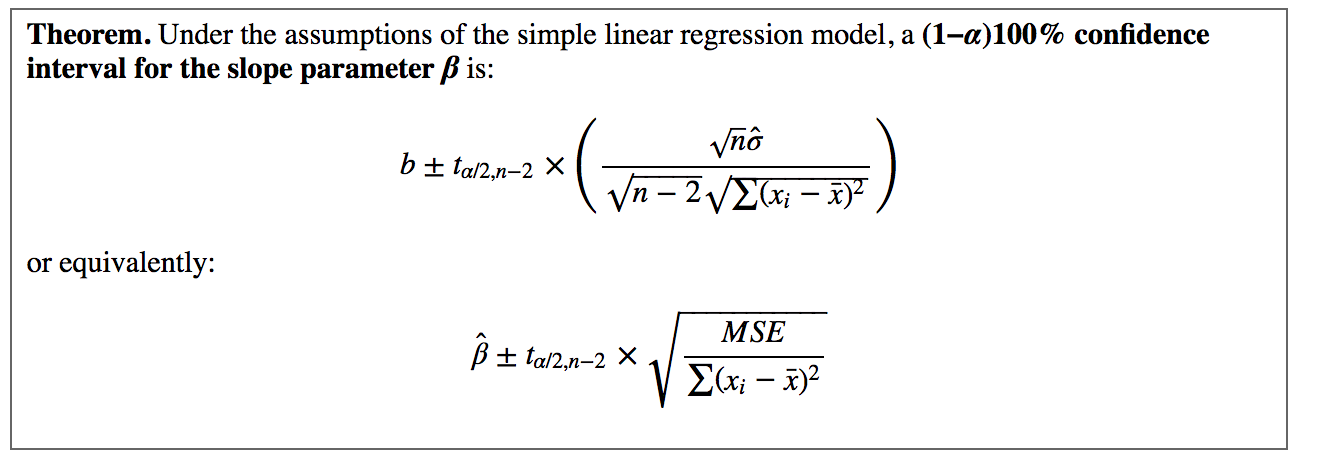

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

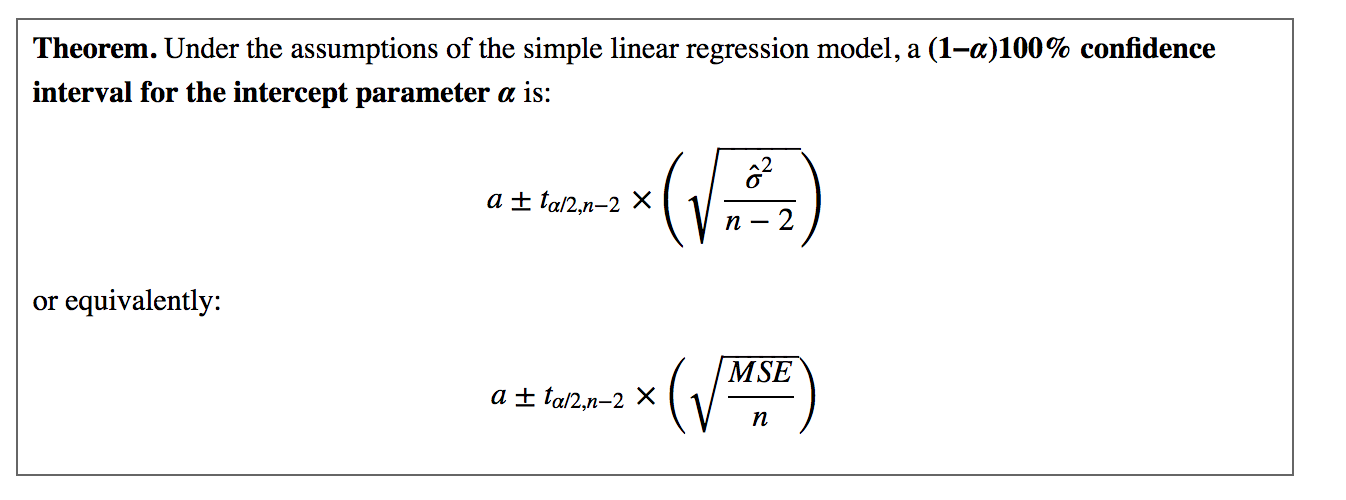

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

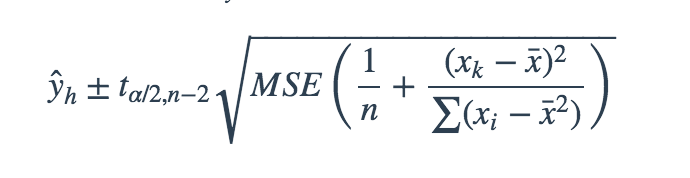

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

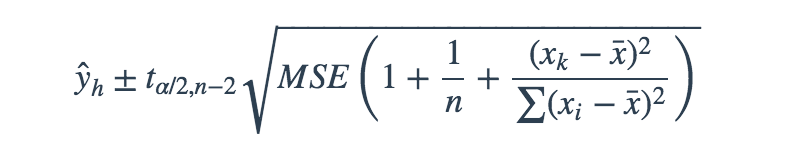

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

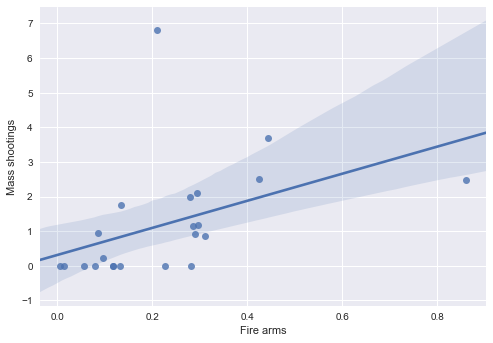

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

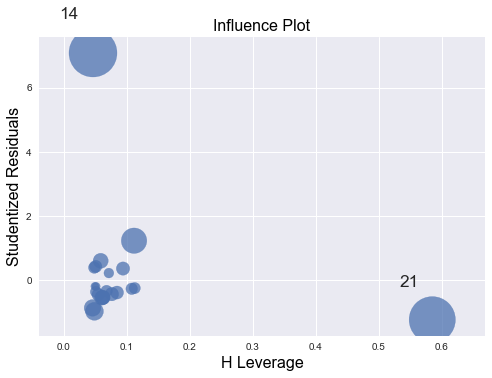

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings